<a href="https://www.kaggle.com/code/sarahmclain/productivity-hourly-compensation?scriptVersionId=146989411" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/productivity-and-hourly-compensation-1948-2021/productivity_n_hourly_compensation.csv


In [2]:
hours_compensation_df = pd.read_csv('/kaggle/input/productivity-and-hourly-compensation-1948-2021/productivity_n_hourly_compensation.csv')

hours_compensation_df.head()

,year,net_productivity_per_hour_worked,average_compensation_of_production_and_nonsupervisory_workers,average_compensation,median_compensation,men_median_compensation,women_median_compensation
0,2021,91.08,31.55,49.39,26.01,24.22,28.13
1,2020,89.54,31.62,49.59,26.80,24.62,29.41
2,2019,88.10,30.57,47.05,25.13,23.20,27.31
3,2018,87.00,30.14,46.40,24.95,22.48,26.68
4,2017,86.10,29.95,46.03,24.52,22.41,27.06


In [3]:
#columns with null data in data frame
years_with_null = hours_compensation_df.apply(lambda x: x.isnull().any().any())

years_with_null = years_with_null[years_with_null]

print(years_with_null)

median_compensation          True
men_median_compensation      True
women_median_compensation    True
dtype: bool


In [4]:
from plotly.express import line
line(data_frame=hours_compensation_df, x='year', y=hours_compensation_df.drop(columns='year').columns.tolist())

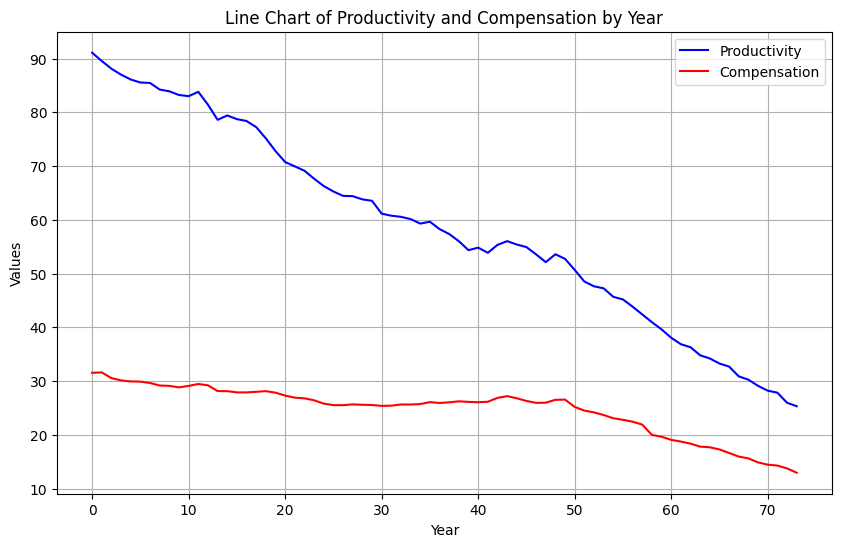

In [5]:
#create a visual of compensation vs productivity over the years

# Set 'year' as the index
#hours_compensation_df.set_index('year', inplace=True)

# Plot the data as a line chart with different colors
productivity_vs_wage_plot = hours_compensation_df[['net_productivity_per_hour_worked', 'average_compensation_of_production_and_nonsupervisory_workers']].plot(kind='line', color=['blue', 'red'], figsize=(10, 6))

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Line Chart of Productivity and Compensation by Year')

# Show the legend
plt.legend(['Productivity', 'Compensation'])

# Show the plot
plt.grid(True)
plt.show()



In [6]:
#men's and womens median comensation by the year

mens_compensation = hours_compensation_df['men_median_compensation'].dropna()

womens_compensation = hours_compensation_df['women_median_compensation'].dropna()

# print(mens_compensation)
# print(womens_compensation)

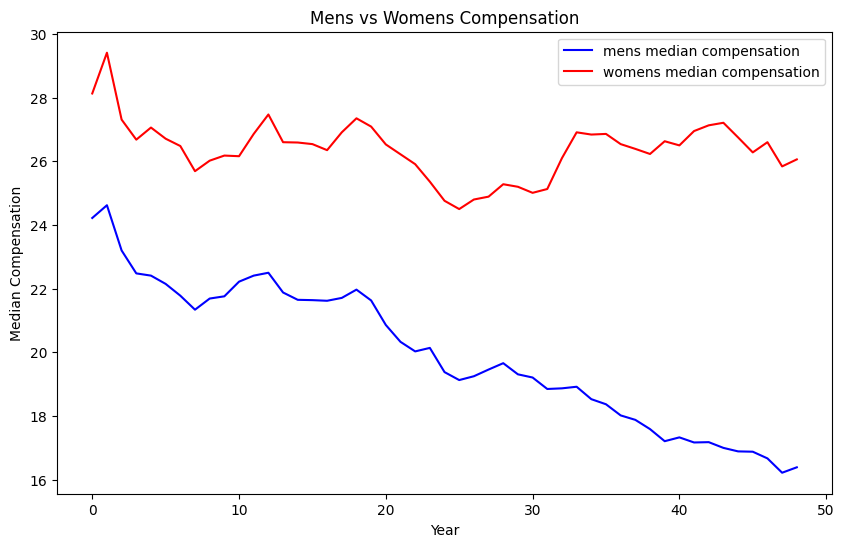

In [7]:
plt.figure(figsize=(10, 6))
mens_vs_womens_compensation_plot = plt.plot(mens_compensation.index, mens_compensation, label='mens median compensation', color='blue'); plt.plot(womens_compensation.index, womens_compensation, label='womens median compensation', color='red')

plt.xlabel('Year')
plt.ylabel('Median Compensation')
plt.title('Mens vs Womens Compensation')

# Show the legend
plt.legend()

# Show the plot
plt.show()


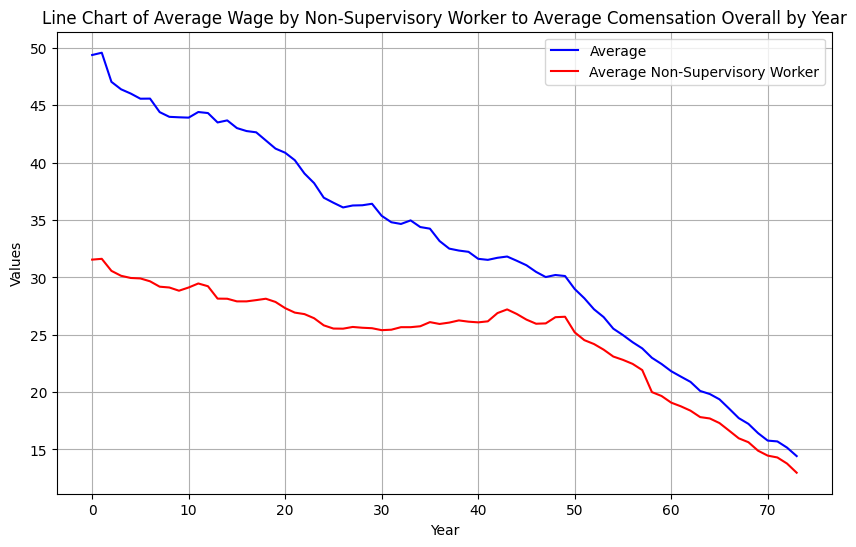

In [8]:
# Plot the data as a line chart with different colors
non_supervisor_wage_vs_avg_wage_plot = hours_compensation_df[['average_compensation', 'average_compensation_of_production_and_nonsupervisory_workers']].plot(kind='line', color=['blue', 'red'], figsize=(10, 6))

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Line Chart of Average Wage by Non-Supervisory Worker to Average Comensation Overall by Year')

# Show the legend
plt.legend(['Average', 'Average Non-Supervisory Worker'])

# Show the plot
plt.grid(True)
plt.show()

In [9]:
hours_compensation_df['non_supervisor_wage_gap'] = hours_compensation_df['average_compensation'] - hours_compensation_df['average_compensation_of_production_and_nonsupervisory_workers']
hours_compensation_df.head()

,year,net_productivity_per_hour_worked,average_compensation_of_production_and_nonsupervisory_workers,average_compensation,median_compensation,men_median_compensation,women_median_compensation,non_supervisor_wage_gap
0,2021,91.08,31.55,49.39,26.01,24.22,28.13,17.84
1,2020,89.54,31.62,49.59,26.80,24.62,29.41,17.97
2,2019,88.10,30.57,47.05,25.13,23.20,27.31,16.48
3,2018,87.00,30.14,46.40,24.95,22.48,26.68,16.26
4,2017,86.10,29.95,46.03,24.52,22.41,27.06,16.08


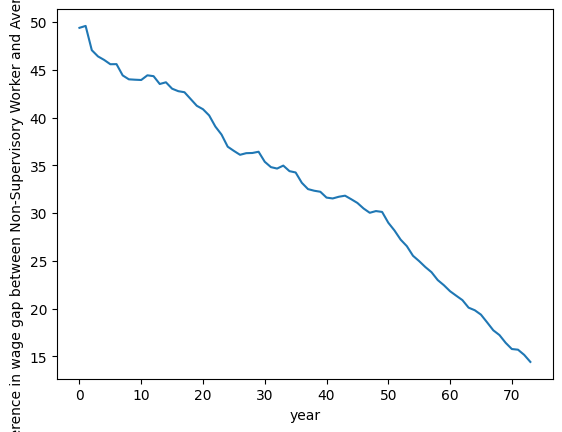

In [10]:
hours_compensation_df['average_compensation'].plot(kind='line')

plt.xlabel('year')
plt.ylabel('Difference in wage gap between Non-Supervisory Worker and Average Wage')

plt.show()